Goal of this program is to run elements of DORA in a way where we can troubleshoot the internal coding pathways

In [6]:
import sys


### Please append the SMA folder that contains DORA 
sys.path.append(r'D:\Jerry\code\OMMxDORA-tomerge\sma')


import DORA
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import itertools

In [11]:
#UNIVERSAL PARAMETERS
#get the name of your folder as a string and put r in front 
folder_name = r"D:\Jerry\code\OMMxDORA-tomerge\test_set\small_csv_batch" #select folder
file_name = '00001.csv'  
pk = os.path.splitext(file_name)[0]
pixel_size = 117  # in nanometers
time_step = 100  # miliseconds per frame in trajectory movie
frame_start = 0  # enter 0 to start from beginning of dataset #ARBITRARILY SET TO 0 AND -1
frame_end = -1  # enter -1 to end at the last value of the data set
cmap = "spring" # enter a color map string from this https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html
exp_tag = "NaN_debug" # a tag that caries the name of the experiment
first_zero_end = 'no'  # yes to cut off all values after first 0,0 = x,y
graph_centers = "yes" #'yes' or 'no' to graphing the centers of the data. 
save_plot = 'yes' 

exp_title = "_simplest_case"
analysisName='Null'

# file_name = csvnum   #Jerry Gets rid of old file title



#universal parameters
exp_tag = exp_title + pk # a tag that caries the name of the experiment


# pixel_size = 117  # in nanometers
time_step = 2  # miliseconds per frame in trajectory movie
# frame_start = 4000  # enter 0 to start from beginning of dataset
# frame_end = 4500 #
frame_start = 0  # enter 0 to start from beginning of dataset
frame_end = -1
# frame_start = 3500  # enter 0 to start from beginning of dataset
# frame_end = 4000
 # enter -1 to end at the last value of the data set
cmap = "spring_r" # enter a color map string from this https://matplotlib.org/2.0.2/examples/color/colormaps_reference.html
first_zero_end = 'no'  # yes to cut off all values after first 0,0 = x,y
graph_centers = "yes" #'yes' or 'no' to graphing the centers of the data. 
save_plot = 'yes' 

#downsampling parameters
bin_size = 20  # bin size for downsample/filter processing
processing = "downsample"  # enter downsample, moving average, or none

#Plot Parameters

#Which Graph?
# plot_type = "grid"
plot_type = "2D"
#Graphing options:
    # Grid plot
        #grid: a grid of little snippets of the data

##### Trajectory Maps Parameters:

# "yes" enables center display of center coordinates if 2D or Find err angle
display_center = "no"

#Labels
x_axis_label = "x (nm)"
y_axis_label = "y (nm)"
z_axis_label = "Time (ms)"  
unit = "nm"  # enter pixel or nm

#Formatting parameters
pixel_min = -0.75  # setting min/max axis range (pixel)
pixel_max = 0.75

# change axis increments for nicely fitting tick marks (pixel)
axis_increment_pixel = 7
# change axis increments for nicely fitting tick marks (nm)
axis_increment_nm = 7
nm_min = -150  # setting min/max axis range (nm)
nm_max = 150
#Do you want to save your plot?
save_plot = 'no'

#########Angle Versus Time (AVT or avt) Graphs

#       Formatting parameters for 'radius filter plot'
rad_filter_type_lower = 'nm'  # enter 'zscore' or 'nm' for choice
rad_filter_type_upper = 'zscore'  # enter 'zscore' or 'nm' for choice
z_up = 3  # enter an upper bound for z score.
z_down = -3  # enter a lower bound for z score
dist_low = 30  # lower bound for ABS of Radius filter
dist_high = 70  # upper bound for ABS of Radius filter



#Formatting parameters 'grid' plot  ##################################FORMATTING SETTINGS FOR GRID
frames_per_plot = 500  # refers to grid plot
columns = 7  # columns of plots (grid plot)
fig_size_x = 40 # adjust display parameters for graphs to fit nicely, mostly used for 'grid' plot
fig_size_y  = 40 # adjust display parameters for graphs to fit nicely, mostly used for 'grid' plot

#Formatting parameters 'animation' plot
frame_speed = 20  # for animation only (ms)
tail_length = 50  # for animation only

#DORA.table parameters: 
save_table = 'no' #saves filtered table if "yes"

#DORA.Caldera parameters:
donut_width = 15

#DORA.collect_variable parameter package
###DataTable = avt_good cannot have bc it has not been defined yet
col = "Delta Angle"
sample_conditions= analysisName
name_saving_folder = "Data Tables"

### Navigate to the correct folder

In [10]:
#Change the folder directory to be the current folder's 
os.chdir(folder_name)

#Take all files in the current folder(the one we just switched to) and store it in a list through which we will iterate
my_files = os.listdir(os.getcwd())

# get current path
path_OG = os.getcwd()

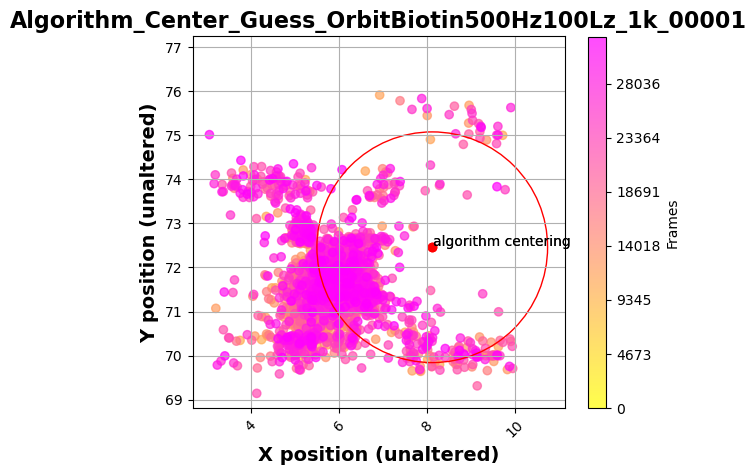

The center is (8.118950172346464, 72.45953805106026)
If the center is satisfactory, change the find_center_coordinates parameter to no
If the center is unsatisfactory, adjust the frame_start and frame_end parameters and try again


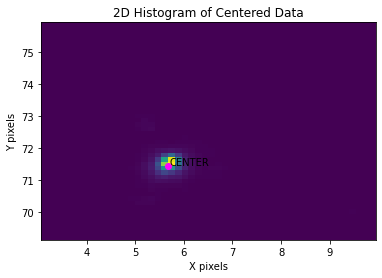

TypeError: tuple indices must be integers or slices, not str

In [12]:
pk = os.path.splitext(file_name)[0]
exp_tag = "OrbitBiotin500Hz100Lz_1k" + "_" + pk
#run DORA.find_center
initial_parameters = [file_name, time_step, frame_start, frame_end, cmap, exp_tag, first_zero_end, graph_centers, save_plot]
center, data, ind_invalid_reading, data_back, my_rad_estimate = DORA.find_center(*initial_parameters)

#prompt user for estimated center
# NEW CENTERING ALGORITHM WITH LOW RES HIST

#section x and y data
x = data["X position"]
y = data["Y position"]

# select arbitrary bin value:
bin_num = 50

center_OR = DORA.find_center_hist_max(x, y, bin_num)





In [28]:
import scipy.stats as stats  # added to calculate z-score for Radius filtering
import math

In [29]:
# substract averages from each column to find displacement, store into new columns
data["X displacement (pixels)"] = data['X position'] - center[0]
data["Y displacement (pixels)"] = data['Y position'] - center[1]
# mutiply pixel displacement columns by scaler to find nm displacement, store in new columns
data["X displacement (nm)"] = data['X displacement (pixels)']*pixel_size
data["Y displacement (nm)"] = data['Y displacement (pixels)']*pixel_size
# multiply the index counter column by time_step to make a time step column, store into new column
data["Time (ms)"] = data['index']*time_step

# drop all NaN values *not a number --> Jerry does not think this is necessary any more
# data = data.dropna()
# #drop NAN try to conserve time (what if we have NAN in x and not in Y? need to drop the whole row)

# Recalculation of center using distance forumla -- Jerry
# Radius Calculation from distance formula
data['Radius (nm)'] = np.power(((data["X displacement (nm)"])
                                ** 2 + (data["Y displacement (nm)"])**2), 0.5)

# Z score calculation
data['z-score Rad'] = stats.zscore(data["Radius (nm)"])

# Angle Calculation

# Radian to degree conversion factor
r2d = 180/np.pi

# Take Arc Tan function of x and y coord to get radius. Arctan 2 makes Quad 3 and 4 negative.
data['Angle'] = -np.arctan2(data['Y displacement (nm)'],
                            data['X displacement (nm)'])*r2d

# Make all negative Theta values positive equivalents
data.loc[data.Angle < 0, ['Angle']] += 360

######################### PROCESSING BLOCK ##############################

# Simple Moving Average or "filter" dataframe:
ma = pd.DataFrame(data.iloc[:, 0], columns=['index'])

window = bin_size
# Built in simple moving average function is applied to normal data and stored in dataframe "ma"
ma['X movement'] = data.iloc[:, 1].rolling(window=window).mean()
ma['Y movement'] = data.iloc[:, 2].rolling(window=window).mean()
ma['X displacement (pixels)'] = data.iloc[:,
                                            3].rolling(window=window).mean()
ma['Y displacement (pixels)'] = data.iloc[:,
                                            4].rolling(window=window).mean()
ma['X displacement (nm)'] = data.iloc[:, 5].rolling(window=window).mean()
ma['Y displacement (nm)'] = data.iloc[:, 6].rolling(window=window).mean()
ma['Time (ms)'] = data.iloc[:, 7].rolling(window=window).mean()

# This block delets the null spaces in the new dataframe and realigns the data
ma = ma.apply(pd.to_numeric, errors='coerce')
ma = ma.dropna()
ma = ma.reset_index(drop=True)

# Downsampling dataframe:
da = pd.DataFrame(data.iloc[:, :])
# divide original index by sample size and round to nearest whole number to
# achieve new index number underwhich the origial index is stored
u = math.floor(frame_start/bin_size)
v = math.floor(frame_end/bin_size)

# isolate the column (if we print this it will show as a dataframe with 2 cols: indexes and time values)
daT_column = da.iloc[:, 7]
daDY_column = da.iloc[:, 6]
daDX_column = da.iloc[:, 5]
daPY_column = da.iloc[:, 4]
daPX_column = da.iloc[:, 3]
daI_column = da.iloc[:, 0]
daX_column = da.iloc[:, 1]
daY_column = da.iloc[:, 2]
# We just want the values in the column
daT = daT_column.values
daDY = daDY_column.values
daDX = daDX_column.values
daPY = daPY_column.values
daPX = daPX_column.values
daI = daI_column.values
daX = daX_column.values
daY = daY_column.values
# This function taken from https://stackoverflow.com/questions/10847660/subsampling-averaging-over-a-numpy-array
# allows us to downsample by averages over a set number
# (change 'n' to the number of values you want to average over)

def average(arr, n):
    end = n * int(len(arr)/n)
    return np.mean(arr[:end].reshape(-1, n), 1)
# Takes a column from our 'da' dataframe and runs the function over it
# stores the new values in variables as an array (values in a row)

# assigning each new row to a varialble
Time = average(daT, bin_size)
Index = average(daI, bin_size)
Xda = average(daX, bin_size)
Yda = average(daY, bin_size)
Ydisnm = average(daDY, bin_size)
Xdisnm = average(daDX, bin_size)
YdisP = average(daPY, bin_size)
XdisP = average(daPX, bin_size)

# reshaping the data in a 1D column
TimeT = Time[:, np.newaxis]
YdisnmT = Ydisnm[:, np.newaxis]
XdisnmT = Xdisnm[:, np.newaxis]
YdisPT = YdisP[:, np.newaxis]
XdisPT = XdisP[:, np.newaxis]
XdaT = Xda[:, np.newaxis]
YdaT = Yda[:, np.newaxis]
IndexT = Index[:, np.newaxis]

# stores in a new dataframe 'dsa' for: downsampling average
dsa = pd.DataFrame(IndexT, columns=['index'])
# appending to our data frame
dsa['X movement'] = XdaT
dsa['Y movement'] = YdaT
dsa['X displacement (pixels)'] = XdisPT
dsa['Y displacement (pixels)'] = YdisPT
dsa['X displacement (nm)'] = XdisnmT
dsa['Y displacement (nm)'] = YdisnmT
dsa['Time (ms)'] = TimeT

# DETERMINE PROCESSING AND UNIT TYPE:
# if more processing methods are to be added, an if statement must be
# added with a key word to select that data frame
# "df" becomes the variable used in the graphing block below
# if processing == "none":
#     df = data
#     return df
# if processing == "moving average":
#     df = ma
#     return df
# if processing == "downsample":
#     df = dsa
#     frame_start = math.floor(frame_start/bin_size)
#     frame_end = math.floor(frame_end/bin_size)
#     return df, frame_start, frame_end

In [30]:
dsa

,index,X movement,Y movement,X displacement (pixels),Y displacement (pixels),X displacement (nm),Y displacement (nm),Time (ms)
0,9.50,5.834430,71.635239,1358.20,-2.284520,-0.824299,-267.288857,-96.443030
1,29.50,5.792070,71.634969,1374.55,-2.326880,-0.824569,-272.244971,-96.474630
2,49.50,5.820882,71.650360,1336.80,-2.298068,-0.809178,-268.873981,-94.673819
3,69.50,5.866766,71.622861,1272.50,-2.252184,-0.836677,-263.505534,-97.891203
4,89.50,5.778903,71.676607,1320.55,-2.340047,-0.782931,-273.785476,-91.602962
...,...,...,...,...,...,...,...,...
1038,31484.65,5.807268,71.744094,233.80,-2.311682,-0.715444,-270.466846,-83.706989
1039,31600.45,6.205591,71.805539,228.60,-1.913359,-0.653999,-223.863058,-76.517851
1040,31729.25,5.721923,71.690619,232.05,-2.397027,-0.768919,-280.452181,-89.963541
1041,31878.45,5.845226,71.642650,244.20,-2.273724,-0.816888,-266.025699,-95.575876


In [20]:
# run DORA.downsampling
processing = "downsample"
downsample_parameters = [bin_size, processing, data, center_OR, time_step, pixel_size, frame_start, frame_end]
down_sampled_df = DORA.downsample(*downsample_parameters)

In [24]:
df = down_sampled_df
pd.DataFrame(df)

c:\ProgramData\Anaconda3\envs\RyanOrigami_clone_jw\lib\site-packages\pandas\core\internals\construction.py:576: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


,0
0,index X movement Y movement X disp...
1,0
2,-1


In [ ]:

# run DORA.graph --> Grid graph

#intialize parameters for grid graph
#Trajectory map parameters:
tajectory_map_parameters = [file_name, down_sampled_df, plot_type, display_center, exp_tag, x_axis_label, y_axis_label, z_axis_label, unit, 
pixel_min, pixel_max, axis_increment_nm, axis_increment_pixel, nm_min, nm_max, save_plot, frame_start, frame_end, time_step,cmap,exp_tag]

if plot_type == "2D" or plot_type == "3D":
    DORA.graph(plot_type,*tajectory_map_parameters)

In [20]:
down_sampled_df

,index,X position,Y position,Intensity,X displacement (pixels),Y displacement (pixels),X displacement (nm),Y displacement (nm),Time (ms),Radius (nm),z-score Rad,Angle,Delta Angle,Continuous Angle
0,0,6.075274,359.231934,1119,0.205839,0.142209,24.083126,16.638435,0,29.271735,0.991730,325.360365,0.000000,0.000000
2,2,6.046267,359.083221,1060,0.176831,-0.006503,20.689200,-0.760892,4,20.703187,0.126760,2.106232,36.745867,36.745867
3,3,5.991671,359.213013,1152,0.122235,0.123288,14.301530,14.424690,6,20.312692,0.087341,314.754353,-47.351880,-10.606012
4,4,5.997901,359.028778,1158,0.128465,-0.060947,15.030426,-7.130758,8,16.636148,-0.283795,25.380671,70.626319,60.020306
5,5,5.869436,359.090088,1266,0.000000,0.000363,0.000000,0.042489,10,0.042489,-1.958876,270.000000,-115.380671,-55.360365
8,8,6.121534,359.120789,1217,0.252099,0.031064,29.495532,3.634470,16,29.718610,1.036841,352.975364,82.975364,27.614999


### Save Data in mark down folder

In [10]:
#troubleshoot talbe function
# DELETE DORA.table with table()

# def table(*table_parameters):
    # Set up Block

# Accept my variables from graphing parameters
(down_sampled_df, ind_invalid_reading, rad_filter_type_upper,
    rad_filter_type_lower, z_up, z_down, dist_high, dist_low, bin_size, data_back, save_table, file_name) = table_parameters

# import the 2 ways to analyze angular data: 1) Claire's way, 2) Jerry's Way [More Current]
import AngleCalc

# Gather inputs to Cacluate Angle under Jerry's Angle calculation paradigm
inputs_avt_filter = [down_sampled_df, ind_invalid_reading, rad_filter_type_upper,
                        rad_filter_type_lower, z_up, z_down, dist_high, dist_low, bin_size]
# Call and Run Jerry's Angle Calculation
data, xy_goodbad, avt_good, avt_bad, data_fil_dsa, data_fil_down_bad, data_fil_up_bad = AngleCalc.avt_filter(
    *inputs_avt_filter)

print("Checkpoint 1 PASSED: imported function parameters")

Checkpoint 1 PASSED: imported function parameters


In [19]:

################################### [Final Data Table Assembly ] ######################################

# Organzize Data Table with Final Filtered Data [Re insert sus points from lower and upper bound filtering]
# slap all the bad data on the end of the good data
data_final = pd.concat([avt_good, avt_bad])
# sort by index so that values go back to where they are supposed to be:
data_final = data_final.sort_values(by=["index"])
data_final

,index,Time (ms),Angle,Delta Angle,Continuous Angle
0,0.0,0.0,325.360365,NaN,NaN
2,2.0,4.0,2.106232,NaN,NaN
3,3.0,6.0,314.754353,NaN,NaN
4,4.0,8.0,25.380671,NaN,NaN
5,5.0,10.0,270.000000,NaN,NaN
8,8.0,16.0,352.975364,NaN,NaN
0,NaN,NaN,NaN,0.0,0.0


In [17]:


# re insert sus points [re insert sus points from invalid]
# Organzize Data Table with Front End data (data) and back end data (data_back)
# slap all the bad data on the end of the good data
data_final_final = pd.concat([data_back, data_final])
# sort by index so that values go back to where they are supposed to be:
data_final_final = data_final_final.sort_values(by=["index"])

del data_final_final['X position']
del data_final_final['Y position']

print("CP1 :data_final_final initialized")
# Label of the Data with either Normal, Upper bound, Lower Bound, Invalid Reading

# Initialize the data table to be populated
data_final_final["Excluded Type"] = 'None'

# store this into a dummy vector
dummy_vec = data_final_final["Excluded Type"].copy()

# Set all indices of AVT_good to normal
# Select all indicies that are NORMAL --> avt_good indicies  #### THE ERROR WITH THE DORA.table is here 
ind_Normal = avt_good["index"].copy()
dummy_vec[ind_Normal] = 'Normal'

print("CP2 : error columns defined")

# Set all indicies of data_back to 'Invalid Reading' and put them in the dummy variable
ind_IR = data_back["index"].copy()
dummy_vec[ind_IR] = 'Invalid Reading'

# Find bad lower bounds and index for them and set value to "below bound"
ind_bad_down = data_fil_down_bad["index"].copy()
dummy_vec[ind_bad_down] = 'Below Bound'

# fFind bad upper bounds and index for them and set value to "upper bound"
ind_bad_up = data_fil_up_bad["index"].copy()
dummy_vec[ind_bad_up] = 'Above Bound'

print("CP2 : error columns defined")

data_final_final["Excluded Type"] = dummy_vec
data_final_final = data_final_final[[
    "index", "Time (ms)", "Angle", "Delta Angle", "Continuous Angle", "Excluded Type"]]

print("Checkpoint 2 passed: all data is processed")

if save_table == "yes":
    my_title = file_name + "_Final_DataTable.csv"
    data_final_final.to_csv(
        my_title, index="false")
    print("I have saved the table for " + file_name + " as " + my_title)

    # return data, avt_good, avt_bad, data_final_final

CP1 :data_final_final initialized


InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [8]:
# Load table parameters
table_parameters = [down_sampled_df, ind_invalid_reading, rad_filter_type_upper,
                    rad_filter_type_lower, z_up, z_down, dist_high, dist_low, bin_size, data_back,save_table,file_name]

# run DORA.table
DataTable, avt_good, avt_bad, data_final_final = table(*table_parameters)
DataTable


Checkpoint 1 PASSED: imported function parameters


InvalidIndexError: Reindexing only valid with uniquely valued Index objects